Import Neccessary Libraries

In [35]:
import os
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from scipy.signal import convolve
from AccelerometerRecording import AccelerometerRecording
from TwincatRecording import TwincatRecording
import matplotlib.pyplot as plt
import seaborn as sns
from TwinCAT_two_variable_plot import TwinCAT_two_variable_plot
from Accelerometer_two_variable_plot import Accelerometer_two_variable_plot

Importing All TwinCAT Data for a Single Move

In [36]:
folder = r'/home/jamie/Documents/Accelerometer_vs_TwinCAT/Accelerometer-vs-TwinCAT/SG_Slide_Test_accelerometer_vs_twinCAT/single_moves/TwinCAT'

TwinCAT_dfs = {}
TwinCAT_velocities = []

for filename in os.listdir(folder):

    if filename.endswith('.csv'):

        filepath = os.path.join(folder, filename)
        
        specific_velocity = float(TwincatRecording(filepath).velocity)
        TwinCAT_dfs[specific_velocity] = TwincatRecording(filepath)
        TwinCAT_velocities.append(specific_velocity)

for velocity,df in sorted(TwinCAT_dfs.items()):
    print('Test at {velocity}mm/s:\t'.format(velocity=velocity),df)

TwinCAT_velocities.sort()
TwinCAT_dfs[TwinCAT_velocities[0]].data.head()

Test at 500.0mm/s:	 This TwinCAT recording is at 500mm/s from 850.0mm to 150.0mm along the slide. For Debugging rising edge:852.5mm
Test at 2000.0mm/s:	 This TwinCAT recording is at 2000mm/s from 850.0mm to 150.0mm along the slide. For Debugging rising edge:852.5mm
Test at 4000.0mm/s:	 This TwinCAT recording is at 4000mm/s from 850.0mm to 150.0mm along the slide. For Debugging rising edge:852.5mm


,Time (ms),ActCurr,ActPos,ActVelo,actCurrent,actPosition,actVelocity,SetCurr,ActCurr (1),ActHwPos,ActFollowingError,SetAccItp,Velocity m/s,Time (s)
0,0.00,0,850.000252,0.055383,0,850.000323,0,0.140803,0,850.000323,-0.000325,0.0,0.000055,0.00000
1,0.25,0,849.999903,-0.267157,0,849.999611,0,0.139957,0,849.999611,-0.000278,0.0,-0.000267,0.00025
2,0.50,0,850.000270,0.118029,0,850.000577,0,0.139108,0,850.000577,-0.000277,0.0,0.000118,0.00050
3,0.75,0,850.000190,0.020489,0,850.000122,0,0.138309,0,850.000122,-0.000267,0.0,0.000020,0.00075
4,1.00,0,850.000293,0.108254,0,850.000380,0,0.137582,0,850.000380,-0.000270,0.0,0.000108,0.00100


Importing All Accelerometer Data for a Single Move

In [37]:
folder = r'/home/jamie/Documents/Accelerometer_vs_TwinCAT/Accelerometer-vs-TwinCAT/SG_Slide_Test_accelerometer_vs_twinCAT/single_moves/Accelerometer'
sample_rate_hz = 200
Accelerometer_dfs = {}
Accelerometer_velocities = []

for filename in os.listdir(folder):

    if filename.endswith('.csv'):

        filepath = os.path.join(folder, filename)
        
        specific_velocity = float(AccelerometerRecording(filepath,sample_rate_hz).velocity)
        Accelerometer_dfs[specific_velocity] = AccelerometerRecording(filepath,sample_rate_hz)
        Accelerometer_velocities.append(specific_velocity)

for velocity,df in sorted(Accelerometer_dfs.items()):
    print('Test at {velocity}mm/s:\t'.format(velocity=velocity),df)

Accelerometer_velocities.sort()
Accelerometer_dfs[Accelerometer_velocities[0]].data.head(100)

Test at 500.0mm/s:	 This Accelerometer recording is at 500mm/s from 850.0mm to 150.0mm along the slide.
Test at 2000.0mm/s:	 This Accelerometer recording is at 2000mm/s from 850.0mm to 150.0mm along the slide.
Test at 4000.0mm/s:	 This Accelerometer recording is at 4000mm/s from 850.0mm to 150.0mm along the slide.


,Time h/m/s/ms,Device Name,Acceleration X(g),Acceleration Y(g),Acceleration Z(g),Angular velocity X(°/s),Angular velocity Y(°/s),Angular velocity Z(°/s),Angle X(°),Angle Y(°),...,Magnetic field Y(ʯt),Magnetic field Z(ʯt),Temperature(℃),Quaternions 0(),Quaternions 1(),Quaternions 2(),Quaternions 3(),Unnamed: 19,Elapsed Time (ms),Acceleration m/s^2
0,14:30:40.178,WT901BLE67(10961A5BCFA2),-0.060,0.017,0.980,0.000,0.000,0.000,-0.033,-0.115,...,0.008,0.008,24.17,0.99658,-0.00021,-0.00098,0.08194,NaN,0.0,-0.58860
1,14:30:40.178,WT901BLE67(10961A5BCFA2),0.033,-0.005,1.000,0.000,0.061,0.427,-0.033,-0.115,...,0.008,0.008,24.17,0.99658,-0.00021,-0.00098,0.08194,NaN,5.0,0.32373
2,14:30:40.178,WT901BLE67(10961A5BCFA2),-0.025,-0.003,1.002,0.061,-0.061,0.000,-0.033,-0.115,...,0.008,0.008,24.17,0.99658,-0.00021,-0.00098,0.08194,NaN,10.0,-0.24525
3,14:30:40.178,WT901BLE67(10961A5BCFA2),0.045,-0.004,1.000,0.000,0.183,0.244,-0.033,-0.115,...,0.008,0.008,24.17,0.99658,-0.00021,-0.00098,0.08194,NaN,15.0,0.44145
4,14:30:40.179,WT901BLE67(10961A5BCFA2),-0.002,0.014,0.986,0.122,0.000,-0.183,-0.033,-0.115,...,0.008,0.008,24.17,0.99658,-0.00021,-0.00098,0.08194,NaN,20.0,-0.01962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14:30:40.632,WT901BLE67(10961A5BCFA2),0.014,-0.003,0.999,0.000,-0.122,0.244,-0.038,-0.110,...,0.008,0.008,24.17,0.99658,-0.00021,-0.00101,0.08194,NaN,475.0,0.13734
96,14:30:40.689,WT901BLE67(10961A5BCFA2),0.015,0.000,1.001,0.000,-0.061,-0.061,-0.038,-0.110,...,0.008,0.008,24.17,0.99658,-0.00021,-0.00101,0.08194,NaN,480.0,0.14715
97,14:30:40.689,WT901BLE67(10961A5BCFA2),0.002,0.000,1.000,0.122,0.000,0.183,-0.038,-0.110,...,0.008,0.008,24.17,0.99658,-0.00021,-0.00101,0.08194,NaN,485.0,0.01962
98,14:30:40.689,WT901BLE67(10961A5BCFA2),0.005,0.000,0.997,0.000,0.122,-0.061,-0.038,-0.110,...,0.008,0.008,24.17,0.99658,-0.00021,-0.00101,0.08194,NaN,490.0,0.04905


Signal Processing

In [38]:
for velocity in TwinCAT_velocities:
    tc_length_of_kernel = 200
    TwinCAT_dfs[velocity].calculate_acceleration(tc_length_of_kernel)
    TwinCAT_dfs[velocity].convolve_acceleration(tc_length_of_kernel)
    TwinCAT_dfs[velocity].data['SetAccItp'] = TwinCAT_dfs[velocity].data['SetAccItp'] / 1000
    TwinCAT_dfs[velocity].calculate_velocity()

    
#plsgithubwork

for velocity in Accelerometer_velocities:
    #Accelerometer_dfs[velocity].save_as_csv_raw()
    length_of_kernel = 10
    Accelerometer_dfs[velocity].interpolate_acceleration()
    Accelerometer_dfs[velocity].convolve_acceleration(tc_length_of_kernel)
    Accelerometer_dfs[velocity].calculate_velocity()
    Accelerometer_dfs[velocity].convolve_velocity(length_of_kernel)
    #Accelerometer_dfs[velocity].save_as_csv_edited()

In [39]:
for velocity in TwinCAT_velocities:
    extra_time = 1000
    threshold_index_accelerometer = Accelerometer_dfs[velocity].TC_data['Convolved Acceleration m/s^2'].idxmin() - extra_time
    Accelerometer_dfs[velocity].TC_data = Accelerometer_dfs[velocity].TC_data.loc[threshold_index_accelerometer:]
    Accelerometer_dfs[velocity].TC_data['Time (ms)'] = Accelerometer_dfs[velocity].TC_data['Time (ms)'] - Accelerometer_dfs[velocity].TC_data['Time (ms)'].min()
    
    threshold_index_TwinCAT = TwinCAT_dfs[velocity].data['Convolved Acceleration m/s^2'].idxmin() - extra_time
    TwinCAT_dfs[velocity].data = TwinCAT_dfs[velocity].data.loc[threshold_index_TwinCAT:]
    TwinCAT_dfs[velocity].data['Time (ms)'] = TwinCAT_dfs[velocity].data['Time (ms)'] - TwinCAT_dfs[velocity].data['Time (ms)'].min()

TwinCAT vs Accelerometer Graphs

In [40]:
scaling_factor = 2.5
plt.figure(figsize=(16*scaling_factor,9*scaling_factor))

for i,velocity in enumerate(TwinCAT_velocities):
    plt.subplot(len(TwinCAT_velocities)+1,1,i+1)
    sns.lineplot(data=TwinCAT_dfs[velocity].data, x="Time (ms)", y='Convolved Acceleration m/s^2',label = 'TwinCAT')
    sns.lineplot(data=Accelerometer_dfs[velocity].TC_data,x='Time (ms)', y='Convolved Acceleration m/s^2',label = 'Accelerometer')
    sns.lineplot(data=TwinCAT_dfs[velocity].data, x = "Time (ms)", y = 'SetAccItp',label = 'SetAccItp')
    plt.ylabel("Acceleration (m/s^2)")
    plt.xlabel("Time (ms)")
    plt.legend()
    plt.title('Acceleration over Time when set to {velocity}mm/s'.format(velocity=velocity))
    plt.xlim(0,2000)

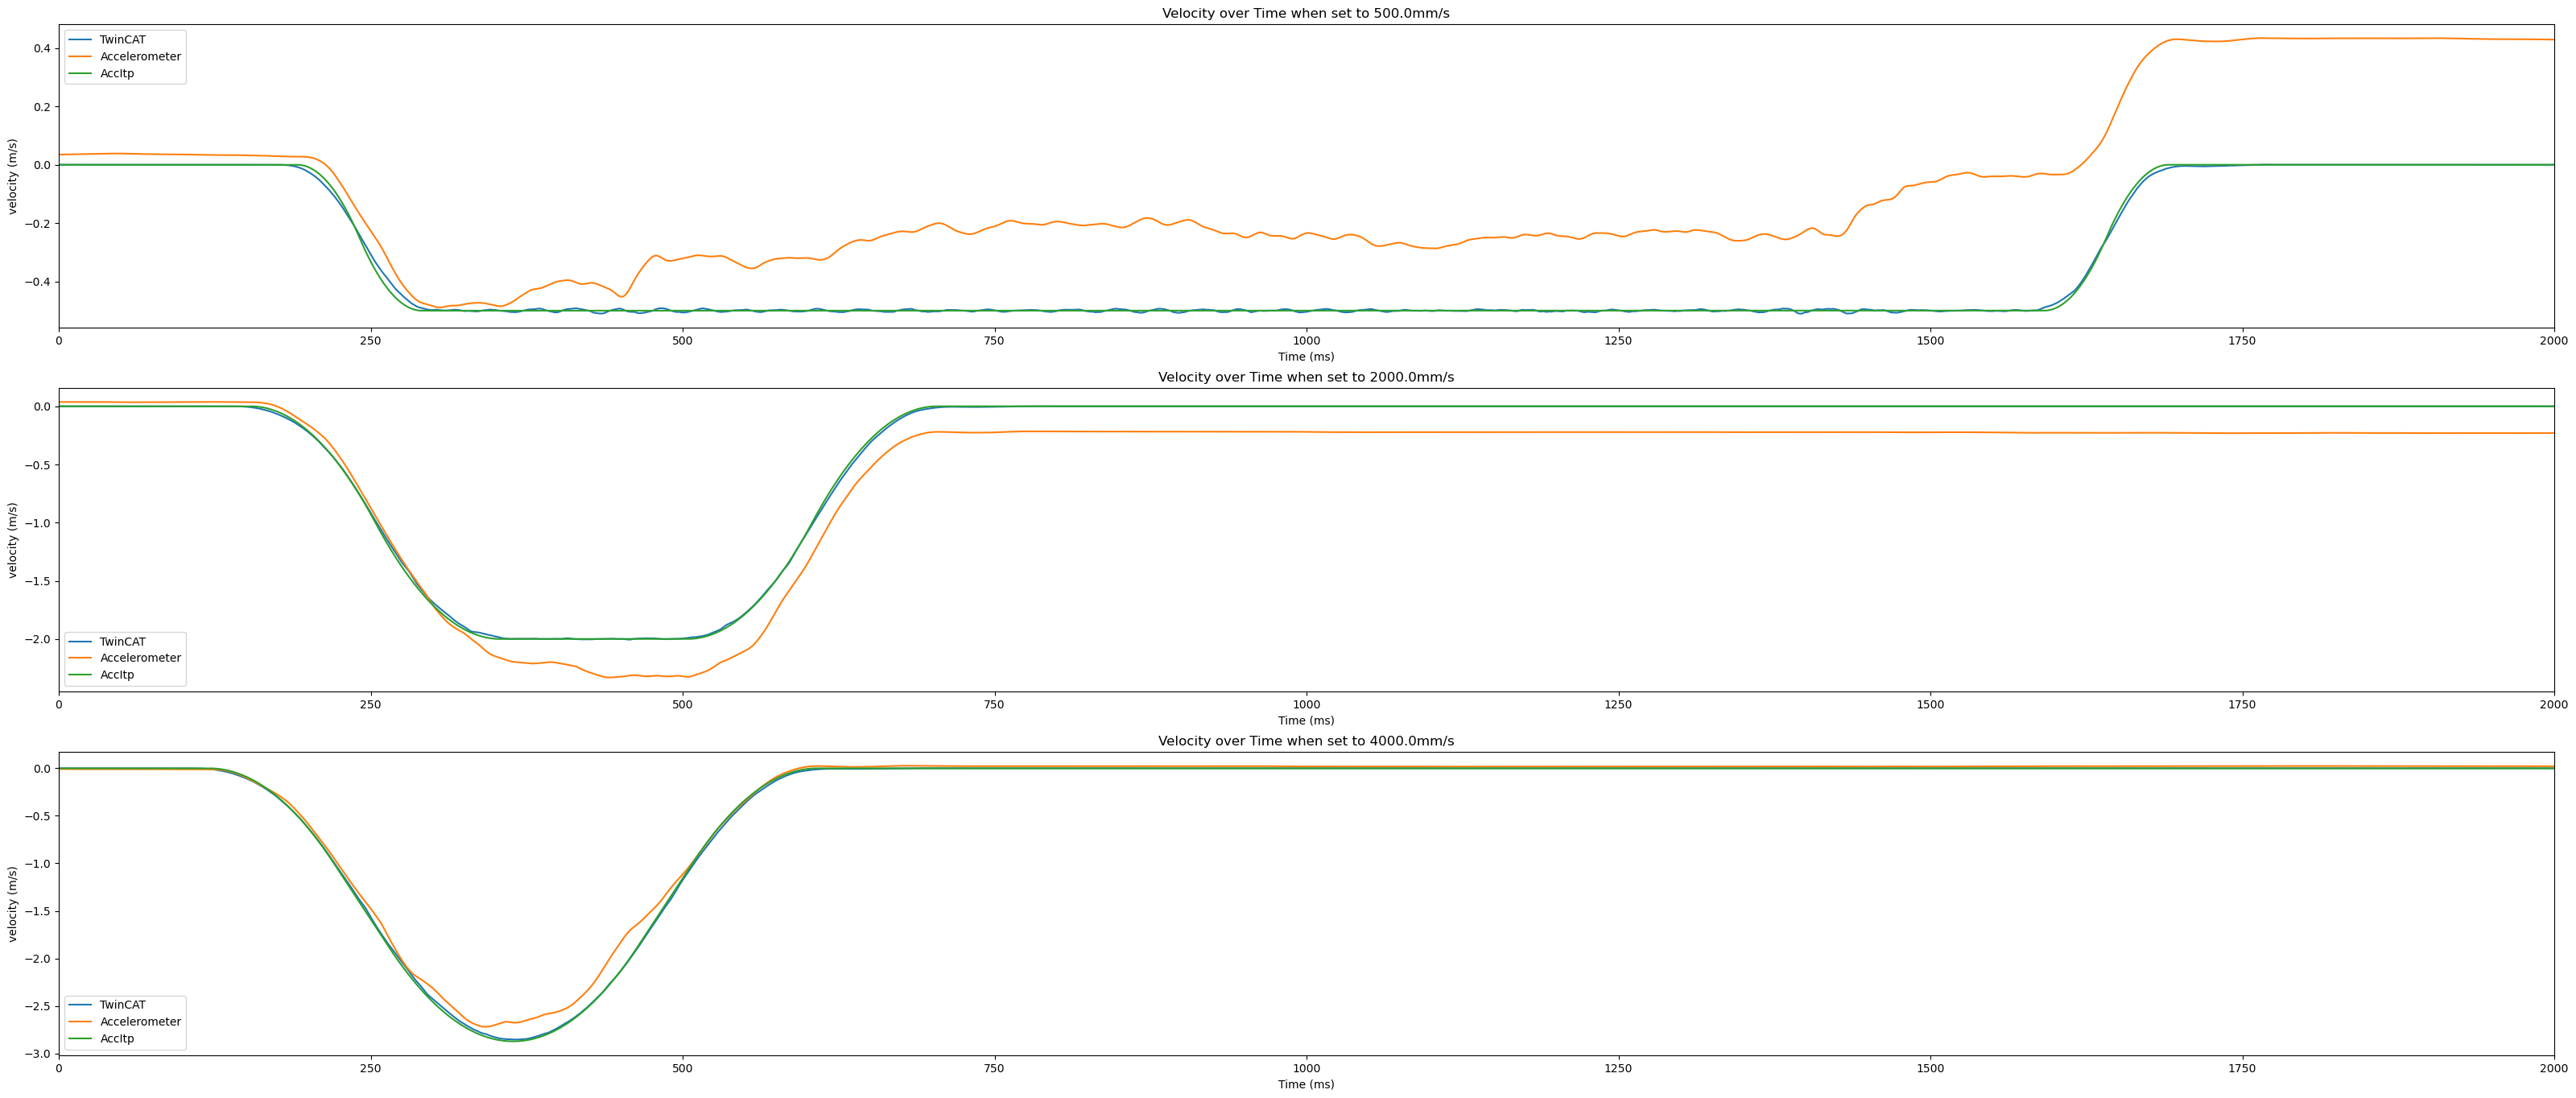

In [ ]:
scaling_factor = 2.5
plt.figure(figsize=(16*scaling_factor,9*scaling_factor))

for i,velocity in enumerate(TwinCAT_velocities):
    plt.subplot(len(TwinCAT_velocities)+1,1,i+1)
    sns.lineplot(data=TwinCAT_dfs[velocity].data, x="Time (ms)", y='Convolved Velocity m/s',label = 'TwinCAT')
    sns.lineplot(data=Accelerometer_dfs[velocity].TC_data,x='Time (ms)', y='Convolved Velocity m/s',label = 'Accelerometer')
    sns.lineplot(data=TwinCAT_dfs[velocity].data, x="Time (ms)", y='AccItp Velocity m/s',label = 'AccItp')
      
    plt.ylabel("velocity (m/s)")
    plt.xlabel("Time (ms)")
    plt.legend()
    plt.title('Velocity over Time when set to {velocity}mm/s'.format(velocity=velocity))
    plt.xlim(0,2000)